“Yelp Inc. (NYSE: YELP) connects people with great local businesses. Yelp was founded in San Francisco in July 2004. Since then, Yelp communities have taken root in major metros across 32 countries. By the end of Q4 2018, Yelpers had written approximately 177 million rich, local reviews, making Yelp the leading local guide for real word-of-mouth on everything from boutiques and mechanics to restaurants and dentists. Approximately 33 million unique devices* accessed Yelp via the Yelp app, approximately 69 million unique visitors visited Yelp via mobile web** and approximately 62 million unique visitors visited Yelp via desktop*** on a monthly average basis during Q4 2018.”

Yelp is a website that offers users an opportunity to leave recommendations for various types of businesses. Yelp also acts a social platform, users are able to have ‘friends’ and rate this ‘friends’ reviews. 
Each year, Yelp provides a data set that that includes information from local business in 10 metropolitan areas across two countries with the aim of having students research or analyze on this data and share their discoveries.

Utilizing the Yelp dataset, the objective of our project is two fold. First we will look at the the social influence that Yelp Elite users have within the Yelp network by focusing on the links in the bipartite network. Do businesses were Elite users have left recommendations often have more recommendations than other restaurants?  

Second, we will build a sentiment analysis of user reviews from the Yelp dataset. We will attempt to find out whether Elite Users tend to leave more positive or negative reviews and based on those reviews, if the business then receives more positive or negative reviews. 

Overall, our analysis will focus on the influence that Elite Yelp users have on business ratings.


In [200]:
#Packages needed to run program
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np

# graph viz
import plotly
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

#graph section
import networkx as nx

#natural language section
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet



%matplotlib inline

First, we load each of the datasets from their JSON format to a pandas dataframe.

In [198]:
tips = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/tip.json', 'r'):
    tips.append(json.loads(line))

tips_df = pd.DataFrame(tips)
tips_df.head()

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [59]:
business = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/business.json', 'r'):
    business.append(json.loads(line))
business_df = pd.DataFrame(business)
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [60]:
review = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/review.json', 'r'):
    review.append(json.loads(line))
review_df = pd.DataFrame(review)
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [61]:
user = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/user.json', 'r'):
    user.append(json.loads(line))
user_df = pd.DataFrame(user)
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


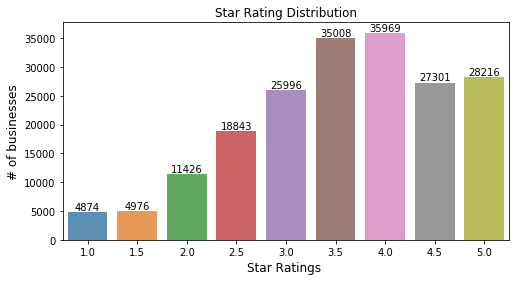

In [66]:
x=business_df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [180]:
business_df['stars'].value_counts()

4.0    35969
3.5    35008
5.0    28216
4.5    27301
3.0    25996
2.5    18843
2.0    11426
1.5     4976
1.0     4874
Name: stars, dtype: int64

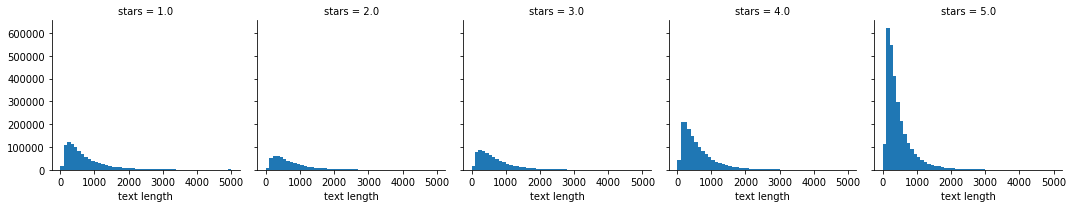

In [188]:
review_df['text length'] = review_df['text'].apply(len)
g = sns.FacetGrid(data=review_df, col='stars')
g.map(plt.hist, 'text length', bins=50)

Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. 

In [190]:
stars = review_df.groupby('stars').mean()
stars

,cool,funny,useful,text length
stars,,,,
1.0,0.243788,0.616449,2.054681,760.444319
2.0,0.399765,0.623617,1.582709,762.703278
3.0,0.672871,0.609040,1.377155,710.315383
4.0,0.860899,0.570298,1.382258,624.224334
5.0,0.561312,0.335379,1.052618,481.532439


In [191]:
stars.corr()

,cool,funny,useful,text length
cool,1.000000,-0.173444,-0.679328,-0.469384
funny,-0.173444,1.000000,0.717921,0.946166
useful,-0.679328,0.717921,1.000000,0.817055
text length,-0.469384,0.946166,0.817055,1.000000


In [196]:
top_cities = business_df.city.value_counts()
top_cities.head(20)

Las Vegas          29370
Toronto            18906
Phoenix            18766
Charlotte           9509
Scottsdale          8837
Calgary             7736
Pittsburgh          7017
Montréal            6449
Mesa                6080
Henderson           4892
Tempe               4550
Chandler            4309
Cleveland           3605
Glendale            3543
Madison             3494
Gilbert             3462
Mississauga         3112
Peoria              1919
Markham             1766
North Las Vegas     1548
Name: city, dtype: int64

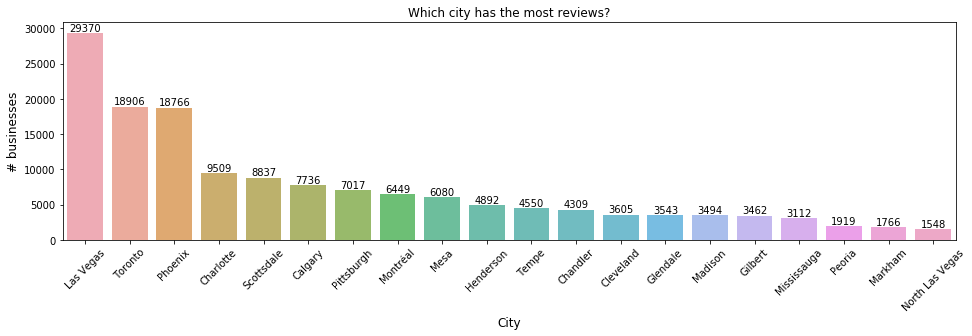

In [193]:
x=business_df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [177]:
business_df[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:50]

,name,review_count,city,stars
82250,Mon Ami Gabi,8348,Las Vegas,4.0
89206,Bacchanal Buffet,8339,Las Vegas,4.0
35199,Wicked Spoon,6708,Las Vegas,3.5
58852,Hash House A Go Go,5763,Las Vegas,4.0
141820,Gordon Ramsay BurGR,5484,Las Vegas,4.0
83950,Earl of Sandwich,5075,Las Vegas,4.5
174616,The Buffet,4400,Las Vegas,3.5
89437,The Cosmopolitan of Las Vegas,4322,Las Vegas,4.0
29614,Secret Pizza,4286,Las Vegas,4.0
1975,The Buffet at Bellagio,4227,Las Vegas,3.5


In [178]:
city_business_reviews = business_df[['city', 'review_count', 'stars']].groupby(['city']).\
agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

,review_count,stars
city,,
Las Vegas,1965651,3.696170
Phoenix,706761,3.646808
Toronto,510856,3.444409
Scottsdale,372805,3.932500
Charlotte,299233,3.539594
Pittsburgh,218776,3.602893
Henderson,210596,3.760221
Tempe,195082,3.688681
Mesa,161847,3.628207


In [181]:
review_df['name'] = review_df['business_id'].map(business_df.set_index('business_id')['name'])

In [182]:
top_restaurants = review_df.name.value_counts().index[:20].tolist()

In [183]:
top_restaurants

['Starbucks',
 "McDonald's",
 'Hash House A Go Go',
 'Chipotle Mexican Grill',
 'Mon Ami Gabi',
 'Bacchanal Buffet',
 'Buffalo Wild Wings',
 'In-N-Out Burger',
 'Wicked Spoon',
 'Panera Bread',
 "Denny's",
 'Subway',
 'The Cheesecake Factory',
 "Dunkin' Donuts",
 'Earl of Sandwich',
 'Yard House',
 "Oregano's Pizza Bistro",
 "Grimaldi's Pizzeria",
 'Discount Tire',
 'Gordon Ramsay BurGR']

In [184]:
df_review_top = review_df.loc[review_df['name'].isin(top_restaurants)]

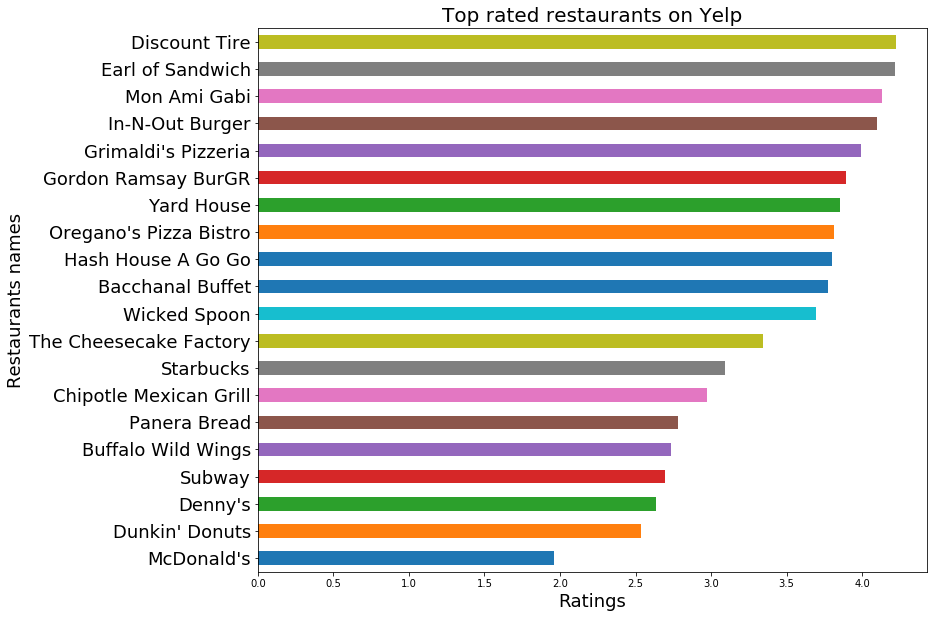

In [185]:
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18) 
plt.show()

Subset business dataframe to only include restuarants

In [205]:
restaurant_df = business_df[business_df['categories'].str.contains("Restaurants", na = False)]

In [206]:
restaurant_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
